# Visualisation des données et Statistiques 
#### Corpus complet (78 codes - 158932 articles) 

In [40]:
# Importer les librairies et les données 
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from collections import Counter

nlp = spacy.load("fr_core_news_sm")

# Importer les données sous formes de dataset pandas 
data = pd.read_csv("../data/annotation_complet_mots.csv")
colonnes = data[["num", "title", "id", "date", "code", "mod_title", "body", "type", "nbr_mot"]]


print(len(data))

158932


### Nombre d'articles dans les codes 

In [4]:
# Exemples de nombre d'article dans les codes 
civil = data[data["code"] == "Code civil"]
print(f"Le code civil contient {len(civil)} articles de loi.")
routier = data.query("`code` == 'Code de la voirie routière'")
print(f"Le code de la voirie routière contient {len(routier)} articles.")

Le code civil contient 2883 articles de loi.
Le code de la voirie routière contient 446 articles.


In [20]:
#Récupérer les listes des tailles et des codes 

# liste des noms des codes (78) 
list_codes = data["code"].drop_duplicates().to_list()
print(f"Liste des noms des codes : {list_codes}")

# liste des nombres d'articles dans chacun des codes 
list_tailles = [len(data.query("`code` == @code")) for code in list_codes]
print(f"Liste des noms du nombre d'articles dans les codes: {list_tailles}")

# Tuple contenant le nombre d'article associé à son code 
lst_len_code = [(code,len(data.query("`code` == @code"))) for code in list_codes]
print(f"Liste de tuples des codes et du nombre d'article : {lst_len_code}")


Liste des noms des codes : ["Code de l'action sociale et des familles", "Code de l'artisanat", 'Code des assurances', "Code de l'aviation civile", "Code du cinéma et de l'image animée", 'Code civil', 'Code de la commande publique', 'Code de commerce', 'Code des communes', 'Code des communes de la Nouvelle-Calédonie', 'Code de la consommation', "Code de la construction et de l'habitation", 'Code de la défense', 'Code de déontologie des architectes', 'Code disciplinaire et pénal de la marine marchande', "Code du domaine de l'Etat", "Code du domaine de l'Etat et des collectivités publiques applicable à la collectivité territoriale de Mayotte", 'Code du domaine public fluvial et de la navigation intérieure', 'Code des douanes', 'Code des douanes de Mayotte', "Code de l'éducation", 'Code électoral', "Code de l'énergie", "Code de l'entrée et du séjour des étrangers et du droit d'asile", "Code de l'environnement", "Code de l'expropriation pour cause d'utilité publique", "Code de la famille et

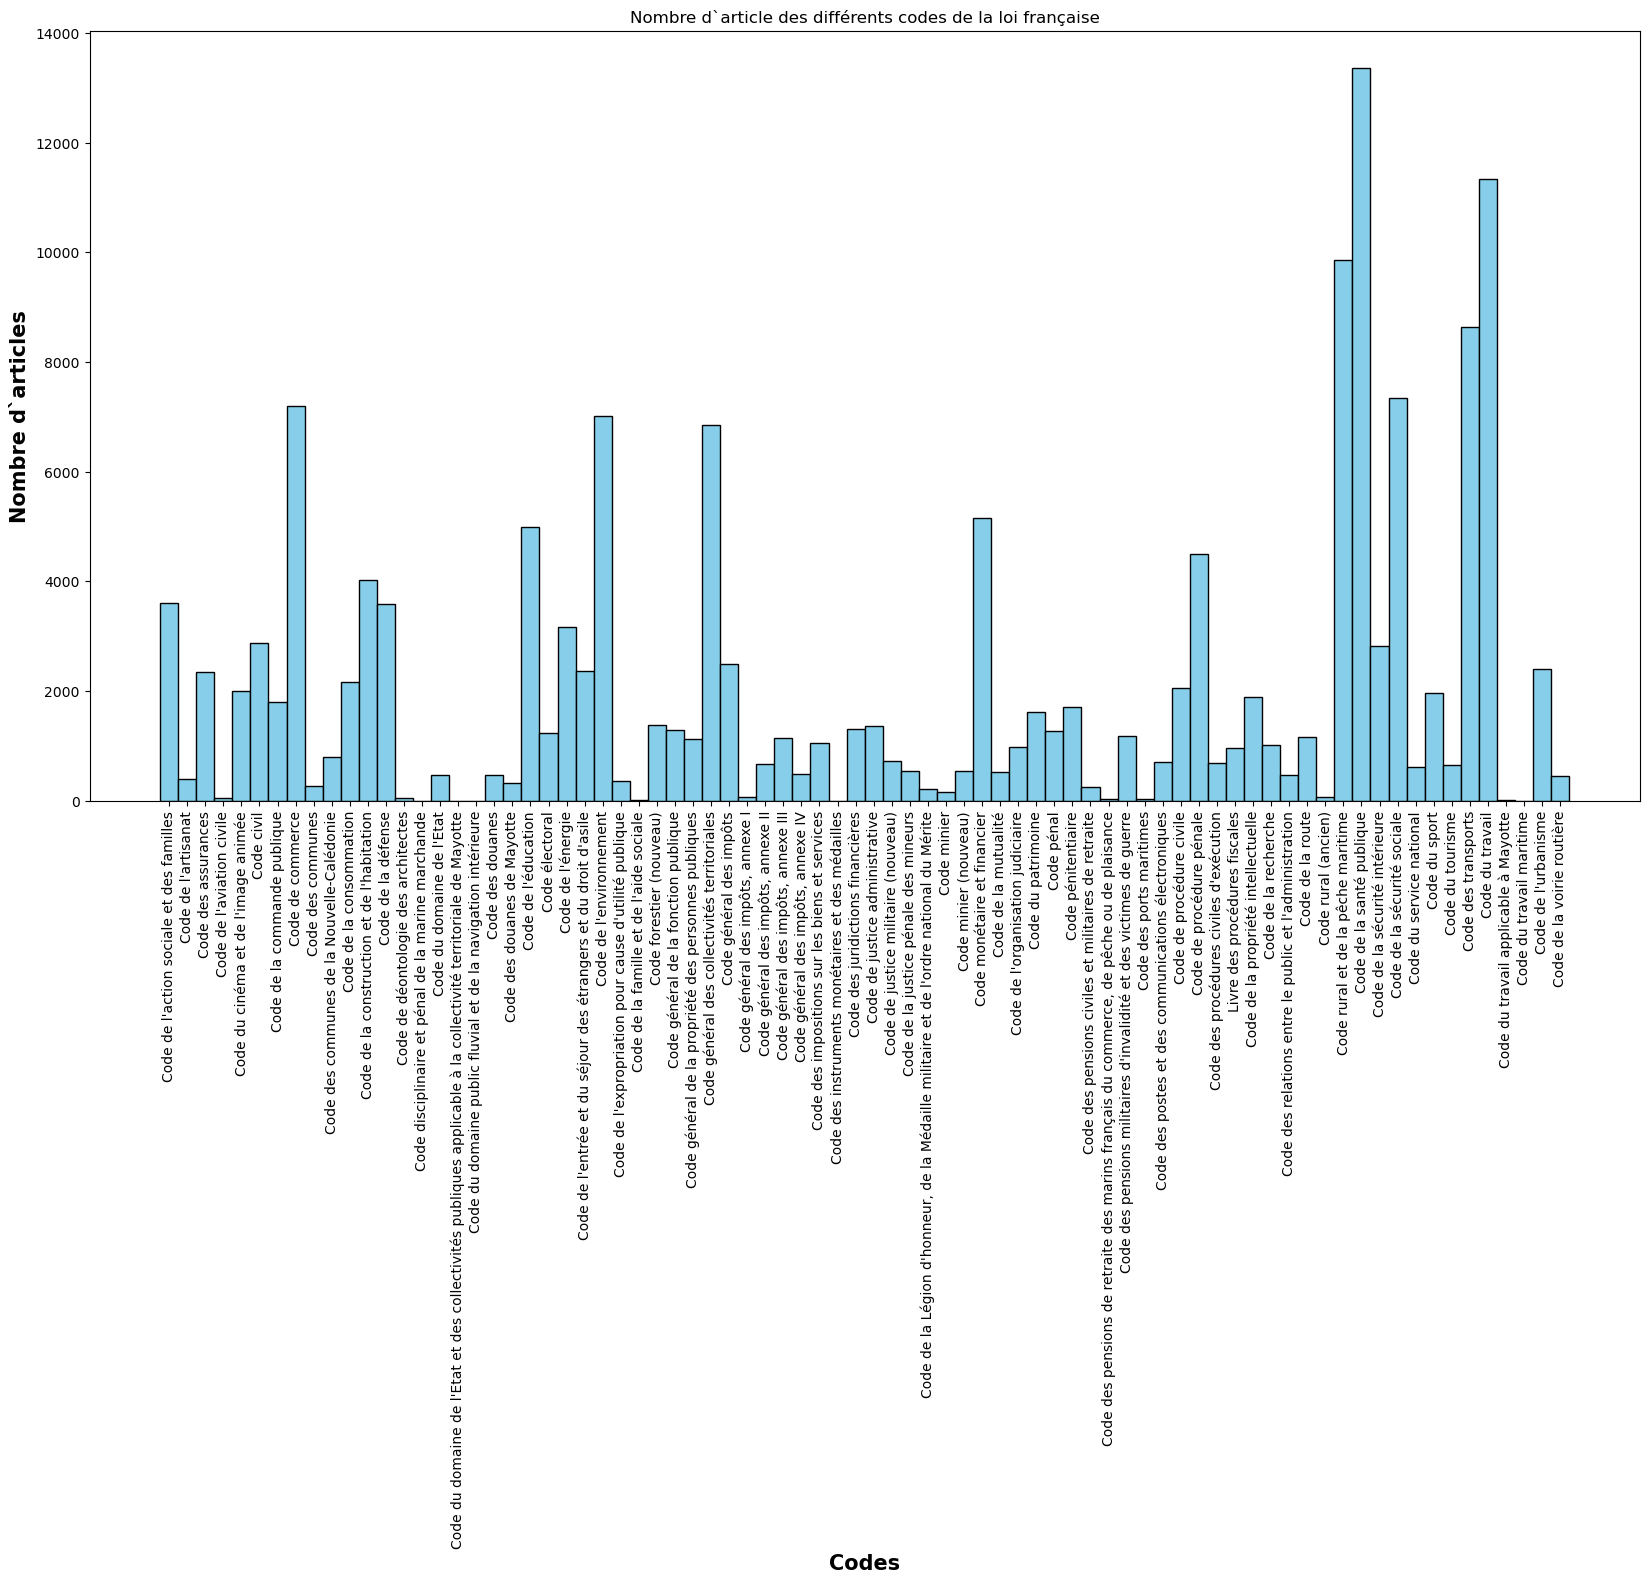

In [51]:
# BarPlot du nombre d'articles par code 

bar_width = 1
indices = range(len(list_codes))
plt.figure(figsize=(20, 10))
plt.bar(indices, list_tailles, color=['skyblue'], width=bar_width, edgecolor='black')
plt.xlabel('Codes', fontweight='bold', fontsize=15)
plt.ylabel('Nombre d`articles', fontweight='bold', fontsize=15)
plt.title('Nombre d`article des différents codes de la loi française')
plt.xticks(indices, list_codes, rotation=90)
plt.show()

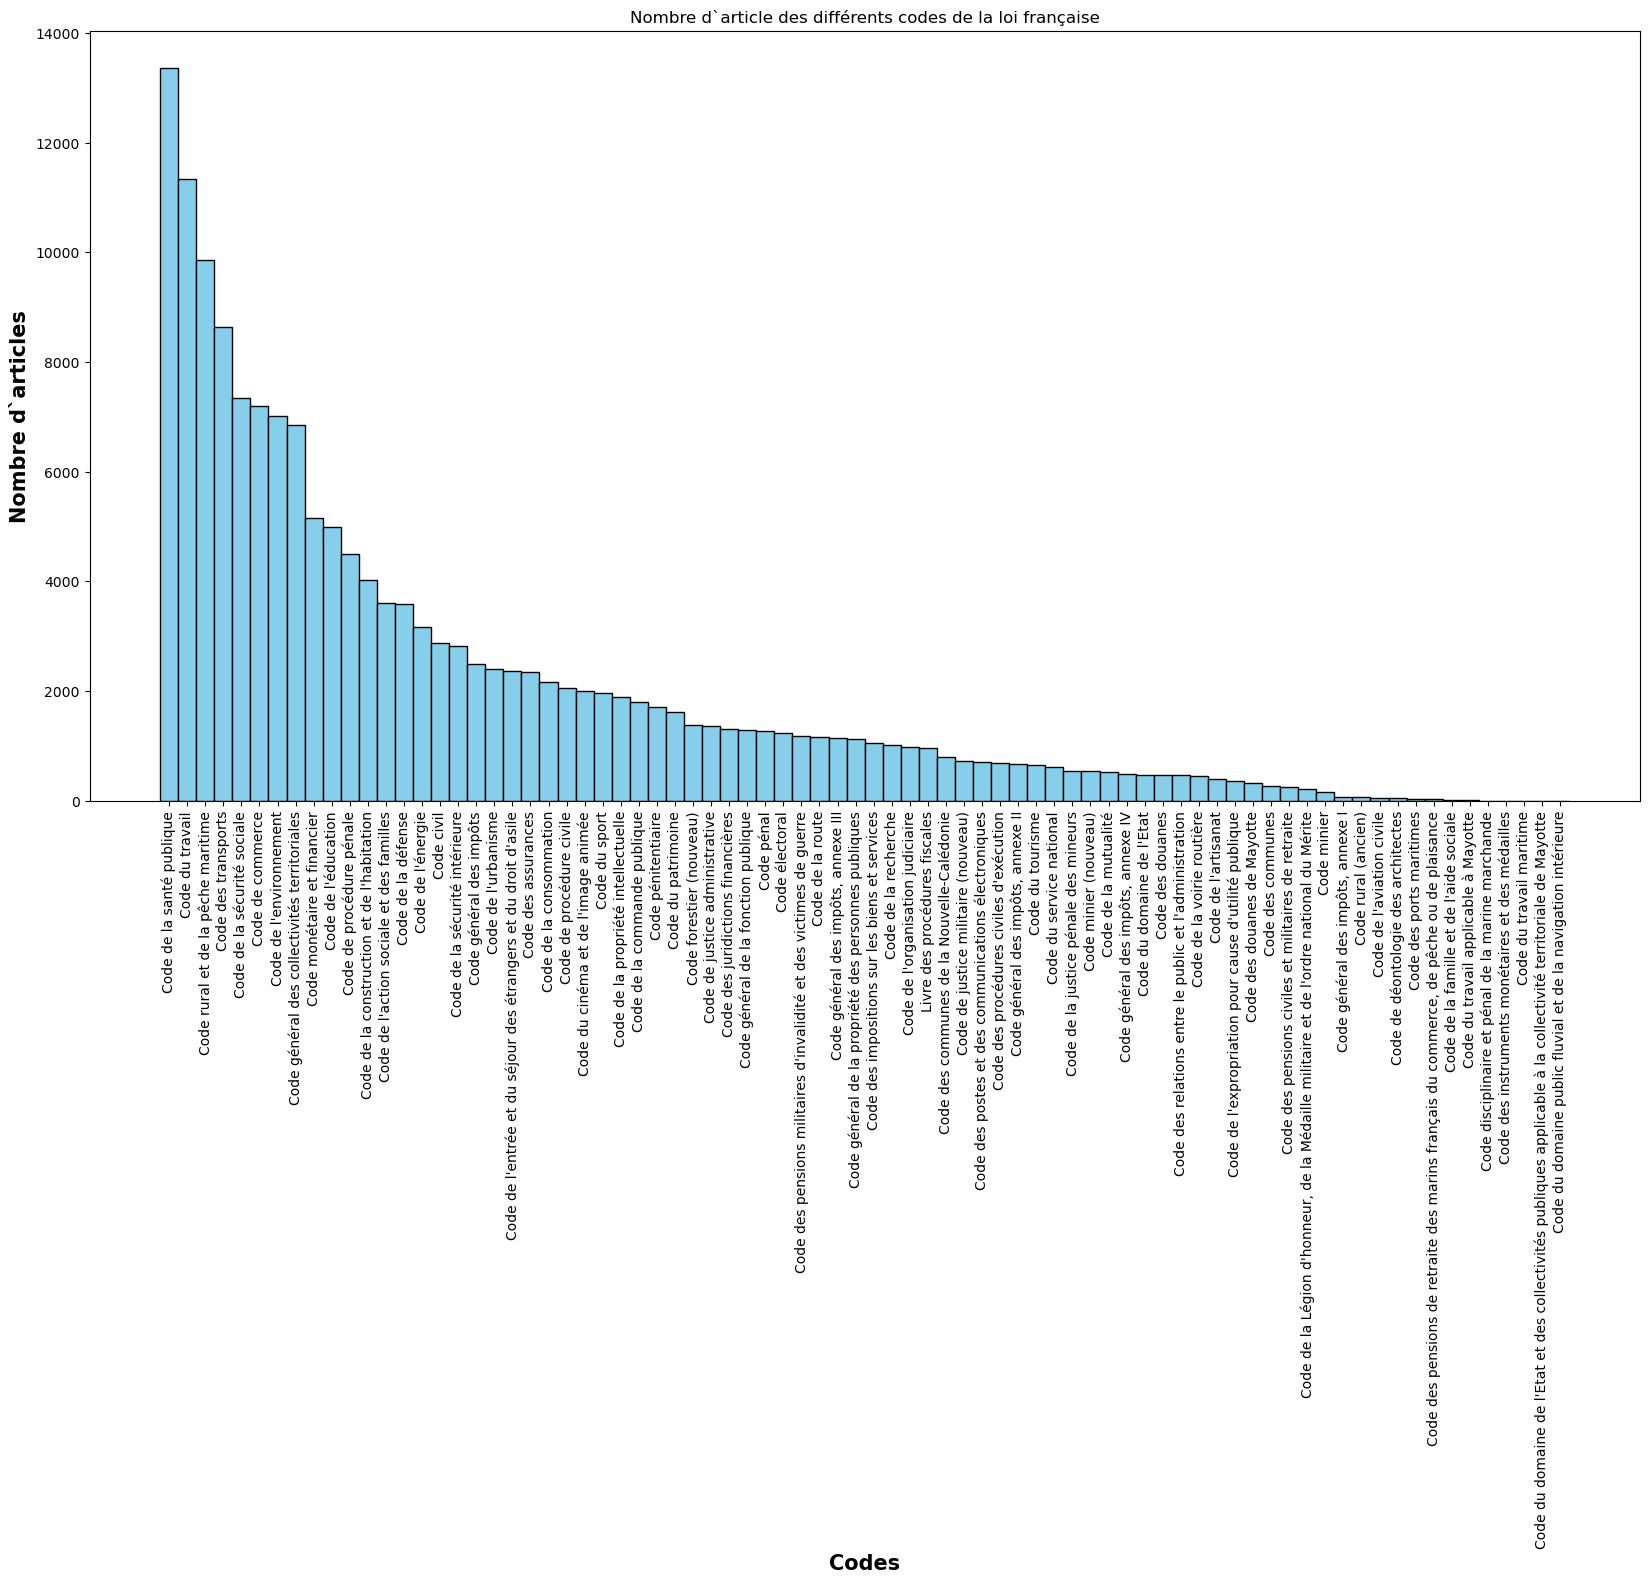

In [52]:
# BarPlot représentant le nombre d'articles par code trié par taille
bar_width = 1
indices = range(len(list_codes))
sorted_values, sorted_categories = zip(*sorted(zip(list_tailles, list_codes), reverse=True))
plt.figure(figsize=(20, 10))
plt.bar(indices, sorted_values, color=['skyblue'], width=bar_width, edgecolor='black')
plt.xlabel('Codes', fontweight='bold', fontsize=15)
plt.ylabel('Nombre d`articles', fontweight='bold', fontsize=15)
plt.title('Nombre d`article des différents codes de la loi française')
plt.xticks(indices, sorted_categories, rotation=90)
plt.show()

### Nombre de mots dans le corpus 


In [44]:
# Tuple contenant le nombre de mots associé à son code 
mean_word_code = data.groupby('code')['nbr_mot'].mean()
sum_word_code = data.groupby('code')['nbr_mot'].sum()

print(f"Liste des codes et de la moyenne de nombre de mots : {mean_word_code}")
print(f"Liste des codes et du nombre de mots : {sum_word_code}")

Liste de tuples des codes et de la moyenne de nombre de mots : code
Code civil                              74.420742
Code de commerce                       165.476897
Code de déontologie des architectes     73.395833
Code de justice administrative         104.762427
Code de justice militaire (nouveau)     92.694938
                                          ...    
Code pénitentiaire                     101.509655
Code rural (ancien)                    111.869565
Code rural et de la pêche maritime     152.515560
Code électoral                         138.046549
Livre des procédures fiscales          159.460021
Name: nbr_mot, Length: 78, dtype: float64
Liste de tuples des codes et du nombre de mots : code
Code civil                              214555
Code de commerce                       1192592
Code de déontologie des architectes       3523
Code de justice administrative          143315
Code de justice militaire (nouveau)      67760
                                        ...   
Code

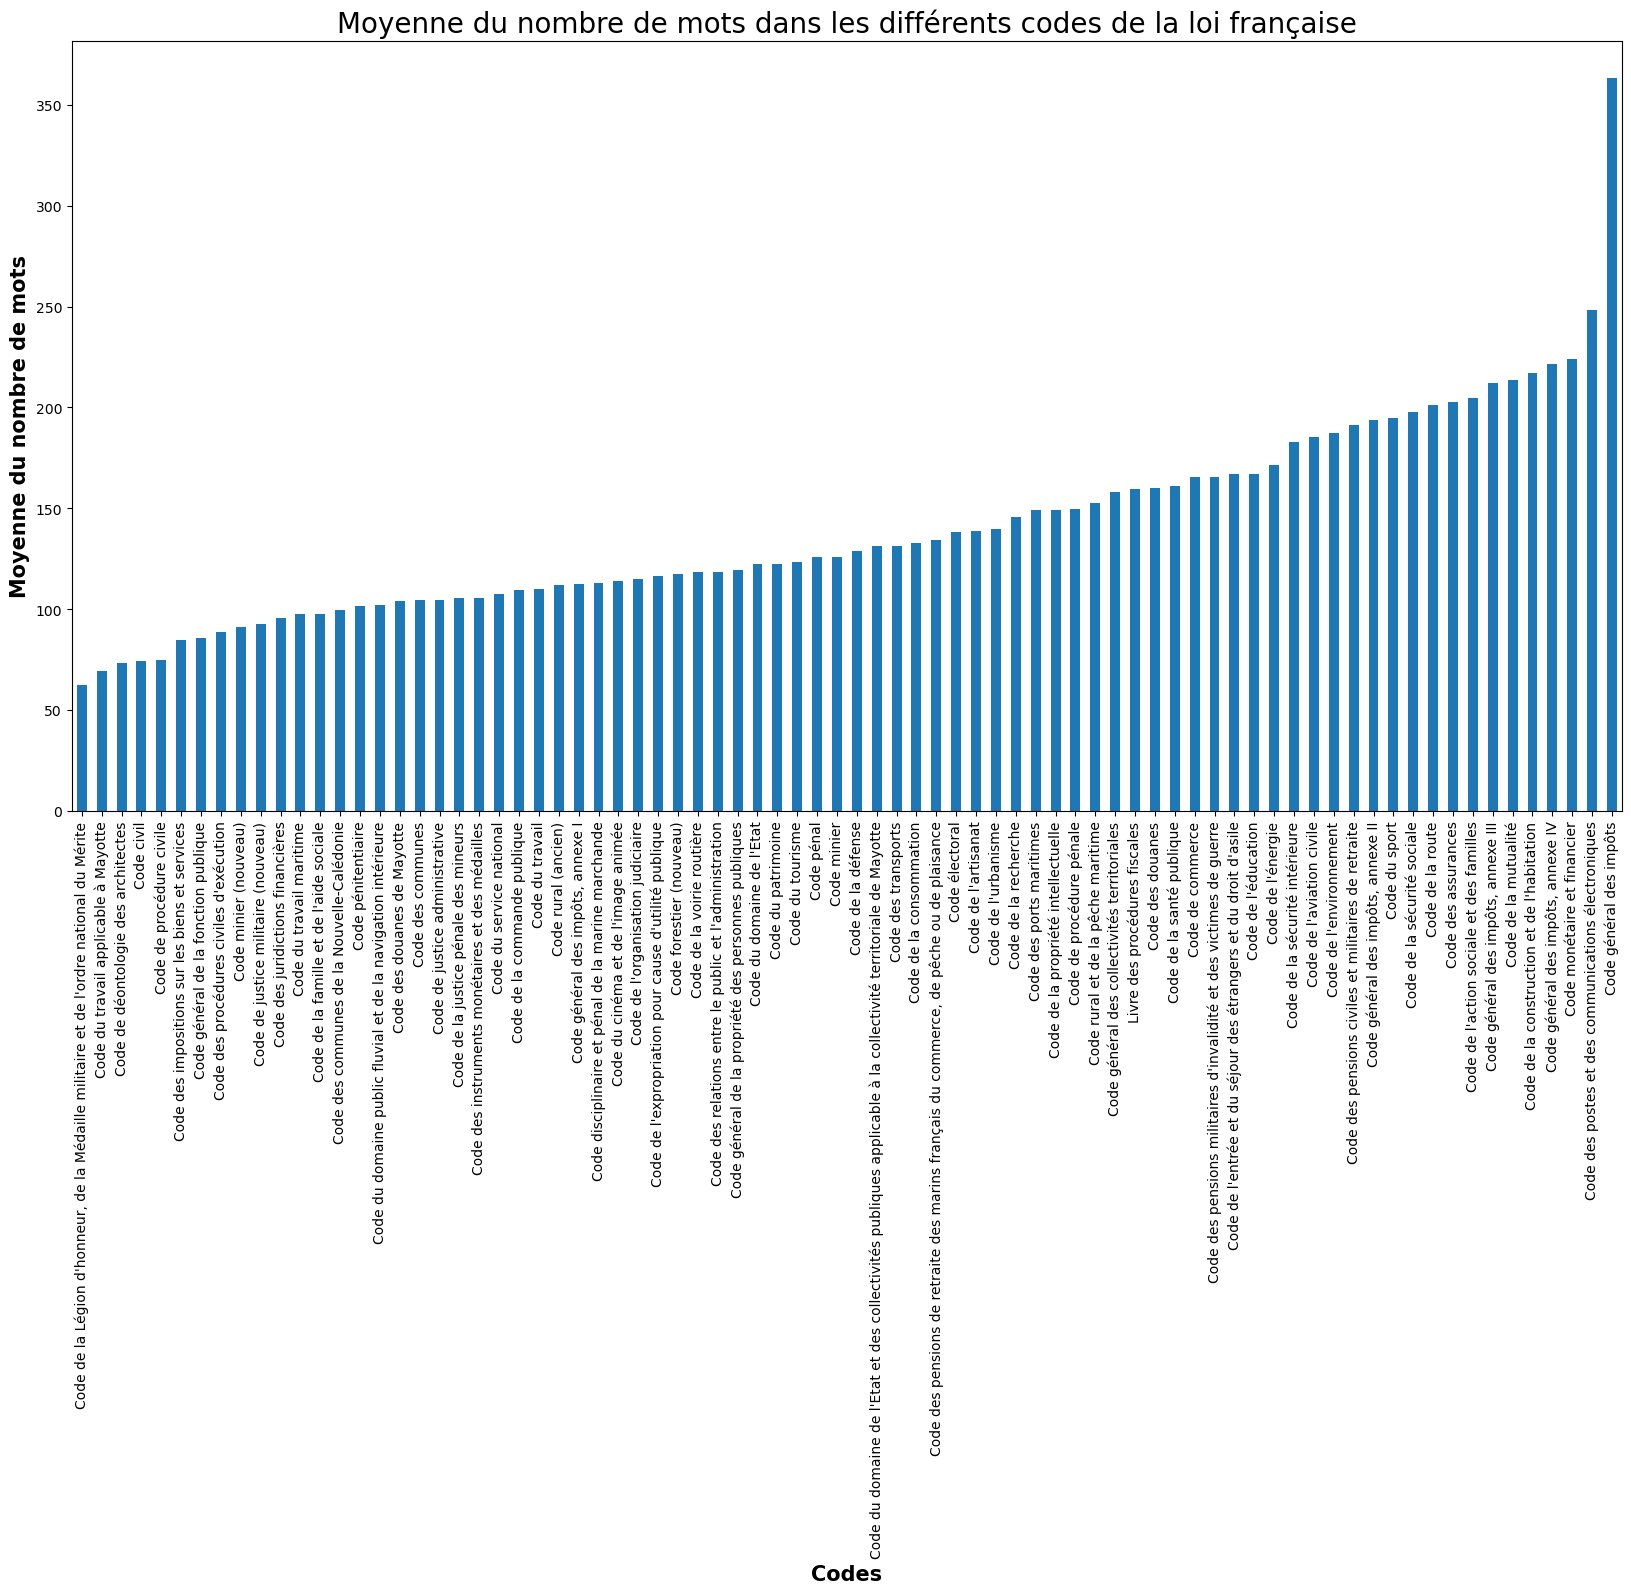

In [45]:
# BarPlot représentant la moyenne de nombre de mots par article par code triés par taille

sorted_word_code = mean_word_code.sort_values()

bar_width = 1
indices = range(len(list_codes))
plt.figure(figsize=(20, 10))
sorted_word_code.plot(kind='bar')
plt.xlabel('Codes', fontweight='bold', fontsize=15)
plt.ylabel('Moyenne du nombre de mots', fontweight='bold', fontsize=15)
plt.title('Moyenne du nombre de mots dans les différents codes de la loi française', fontsize=20)
plt.xticks(indices, rotation=90)
plt.show()

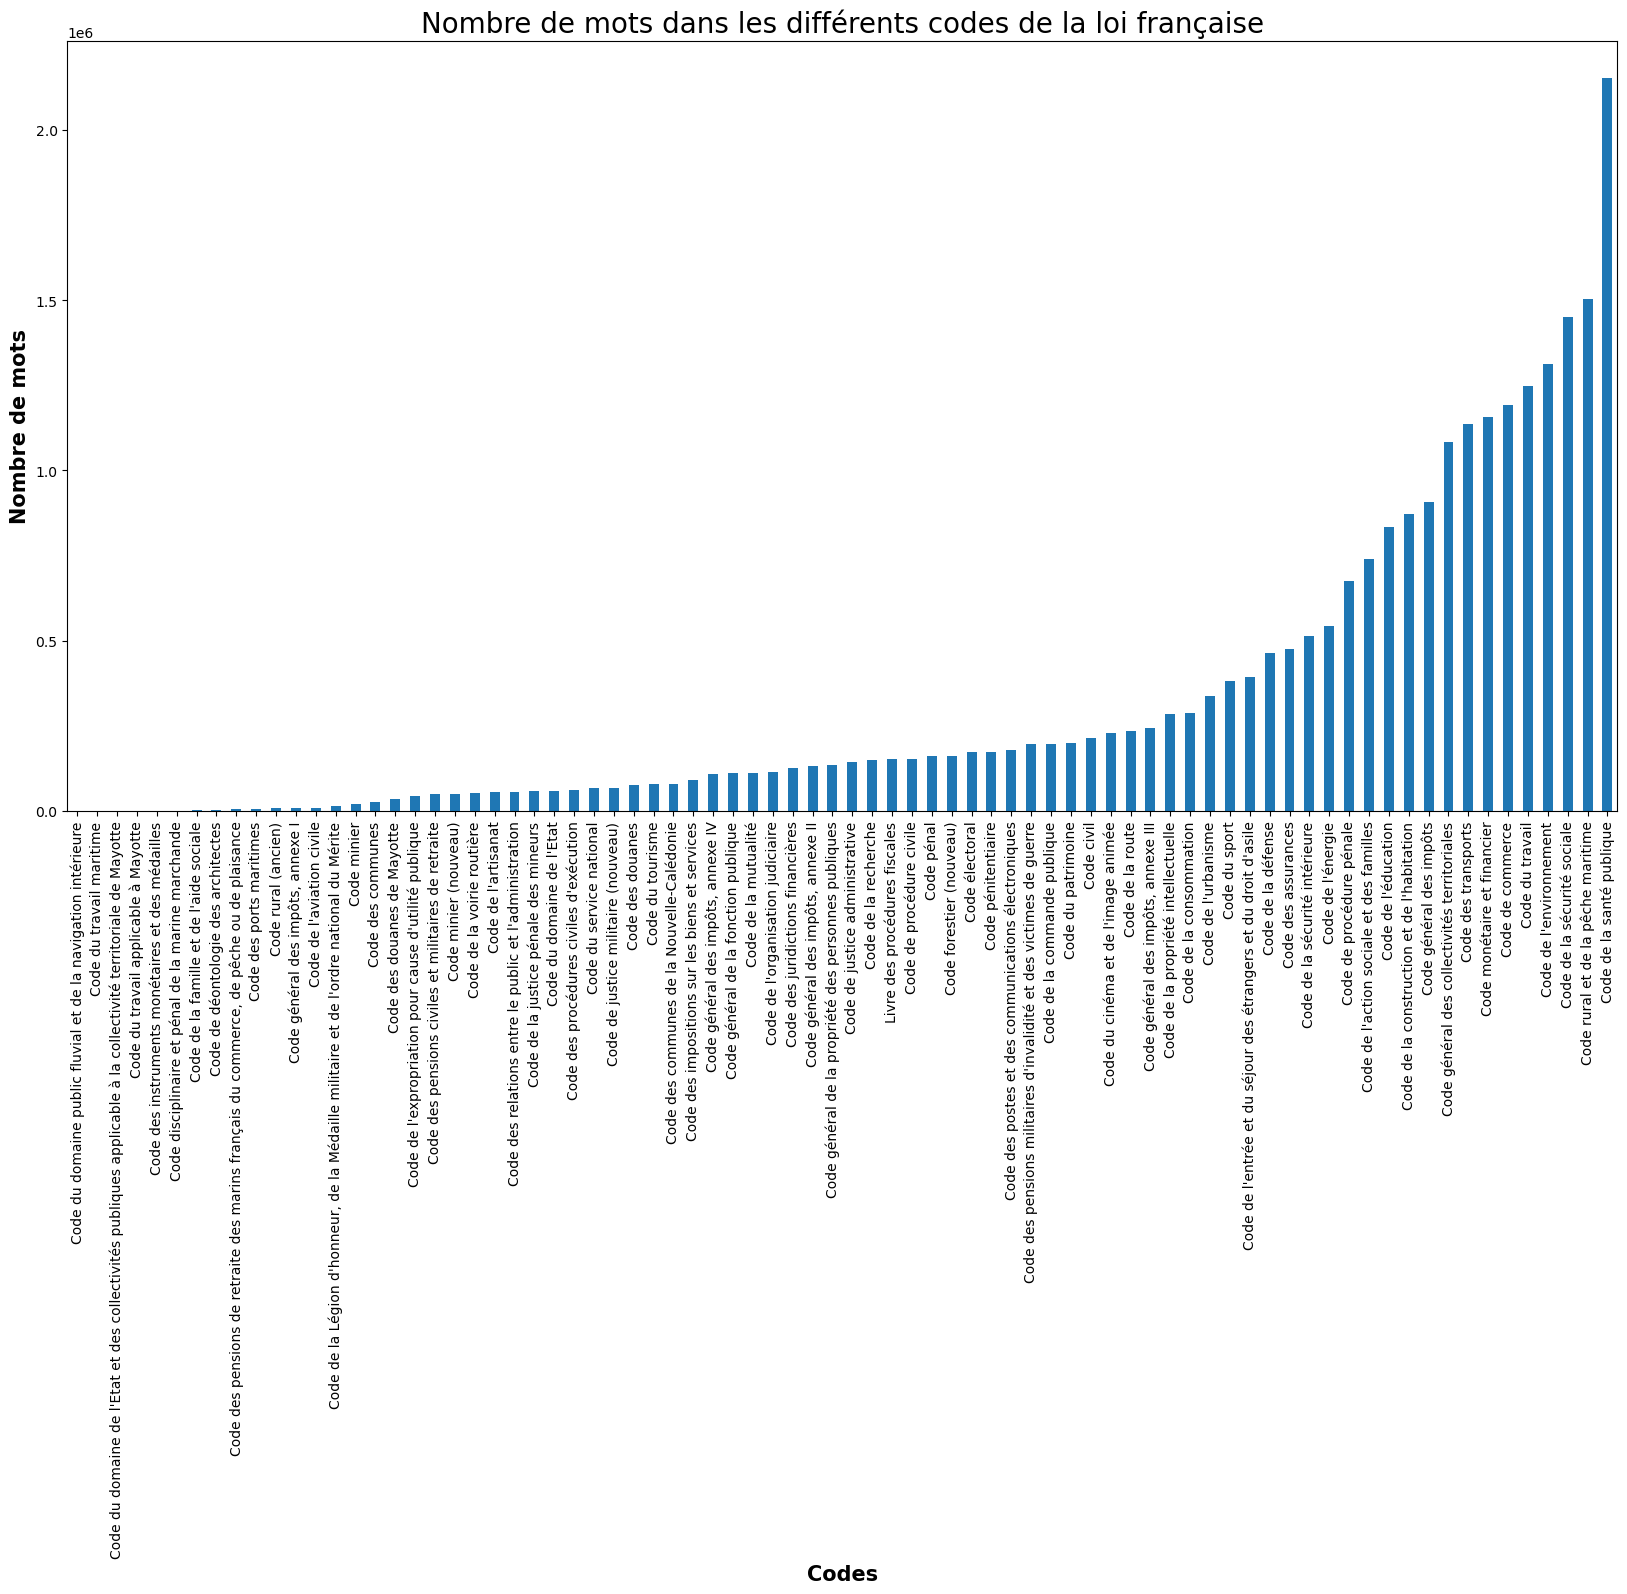

In [46]:
# BarPlot représentant la somme de nombres de mots par code triés

sorted_word_code = sum_word_code.sort_values()

bar_width = 1
indices = range(len(list_codes))
plt.figure(figsize=(20, 10))
sorted_word_code.plot(kind='bar')
plt.xlabel('Codes', fontweight='bold', fontsize=15)
plt.ylabel('Nombre de mots', fontweight='bold', fontsize=15)
plt.title('Nombre de mots dans les différents codes de la loi française',fontsize=20)
plt.xticks(indices, rotation=90)
plt.show()

# Statistiques descriptives 
### Nombre d'article dans les codes 

In [53]:
# moyenne de la taille des codes 
from scipy import stats
import statistics

moyenne_nb_article = statistics.mean(list_tailles)
print(f"La moyenne du nombre d'article par code est de : {moyenne_nb_article}") 

La moyenne du nombre d'article par code est de : 2037.5897435897436


### Les différents types d'article dans les codes 

In [49]:
# Type d'article: L R D A (autres chiffres) 
list_types = data["type"].drop_duplicates().to_list()
print(f"Liste des types d'article : {list_types}")

# Tuple contenant le nombre d'articles pour chaque type 
lst_type_nbr = [(type,len(data.query("`type` == @type"))) for type in list_types]
print(f"Liste de tuples des codes et du nombre d'article : {lst_type_nbr}")

Liste des types d'article : ['L', 'R', 'D', 'A', 'autre']
Liste de tuples des codes et du nombre d'article : [('L', 52079), ('R', 67853), ('D', 20005), ('A', 3134), ('autre', 15861)]


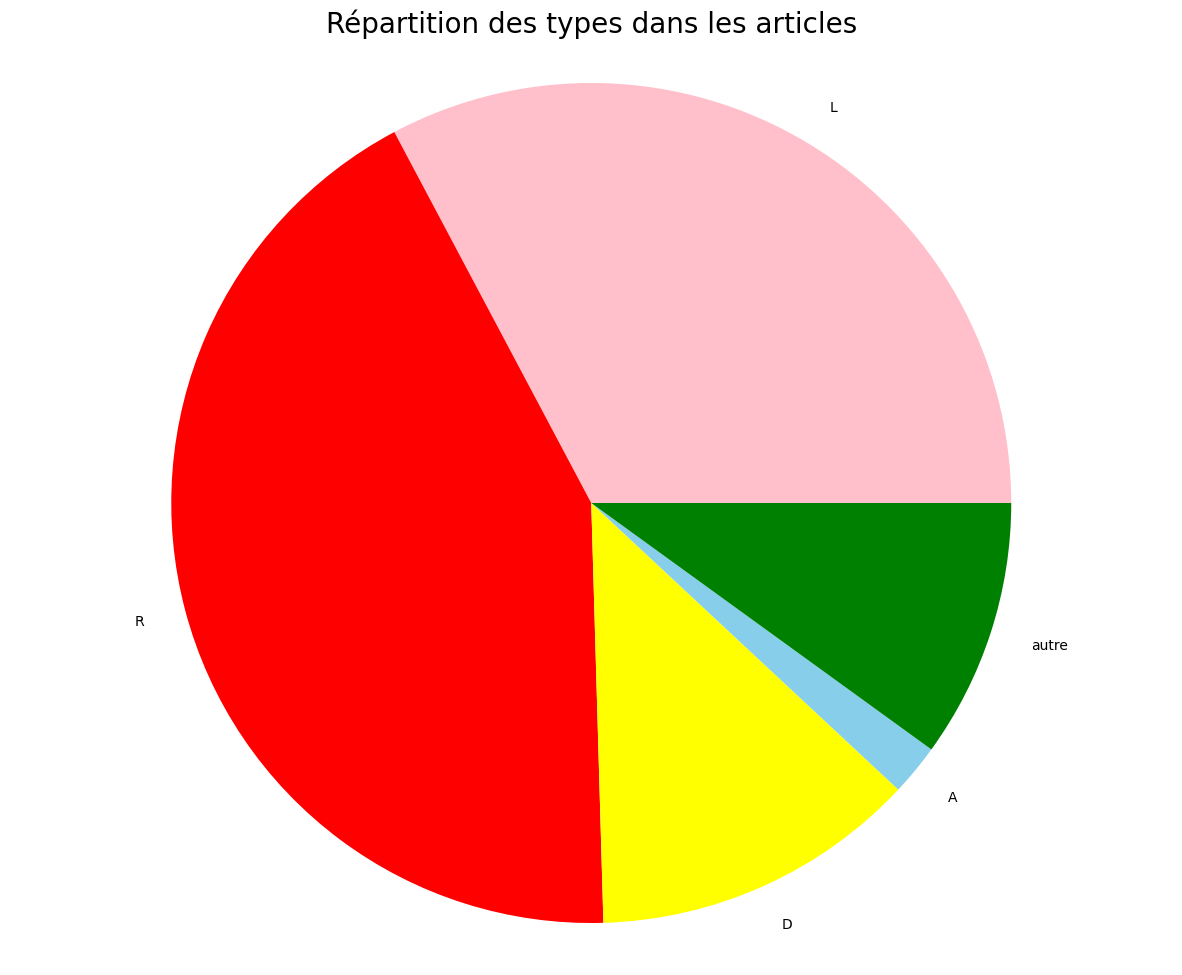

In [51]:
# Camembert de la distribution des types dans le corpus

nom = [type[0] for type in lst_type_nbr]
taille = [type[1] for type in lst_type_nbr]
#print(taille)

plt.figure(figsize=(15, 12))  
plt.pie(taille, labels=nom, colors=["pink", "red", "yellow", "skyblue", "green"])
plt.title(f"Répartition des types dans les articles", fontsize=20)
plt.axis('equal')
plt.show()

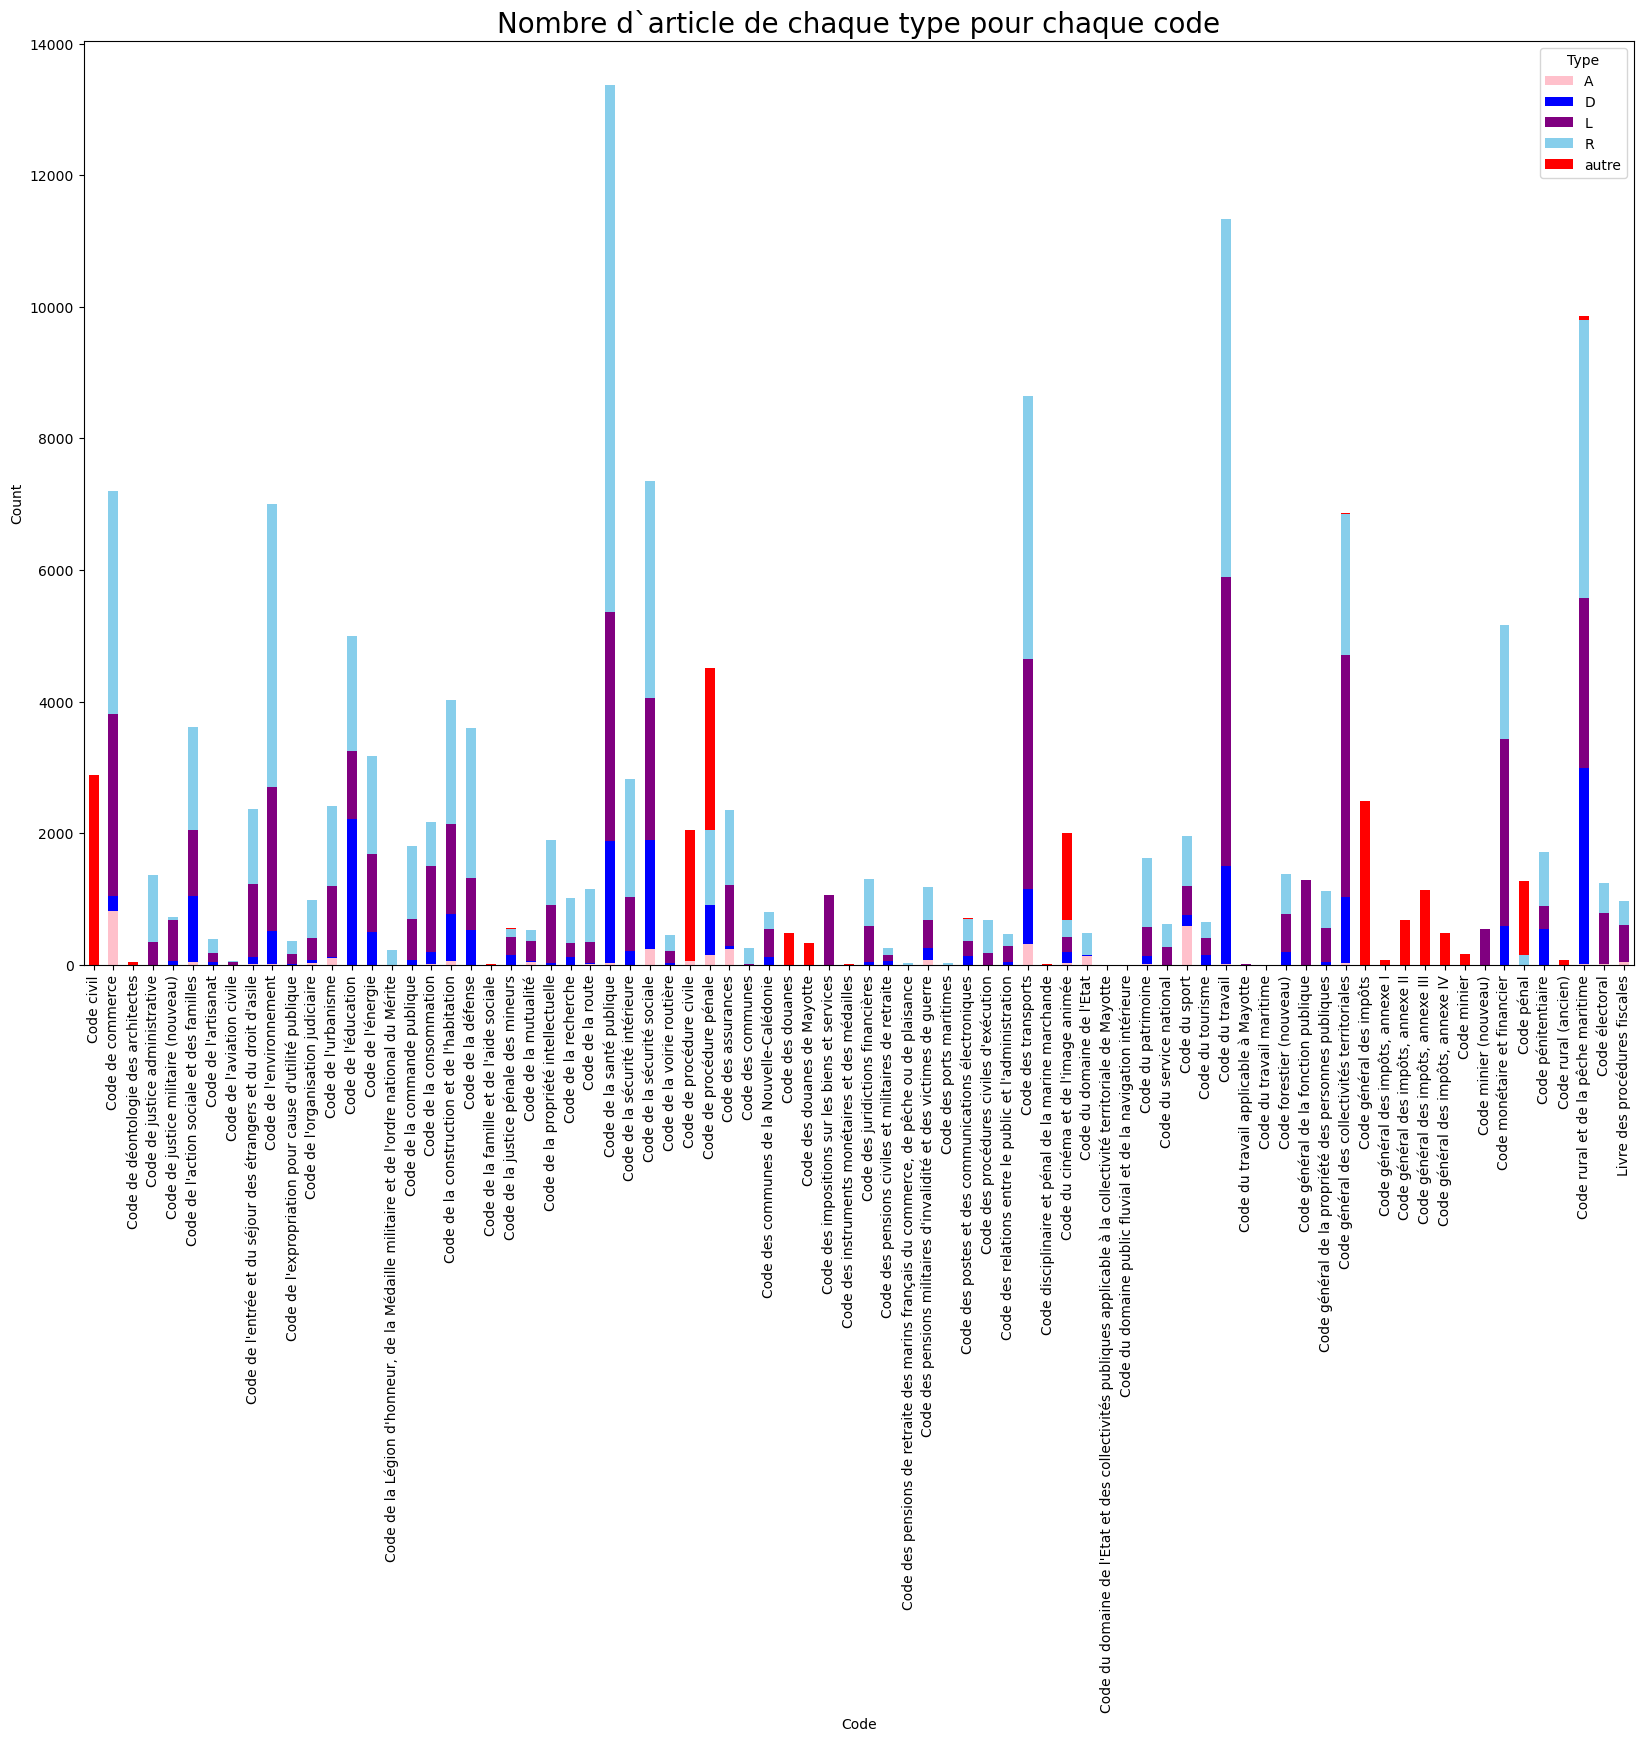

In [52]:
# Nombre d'article de chaque type pour chaque code  

counts = colonnes.groupby(['code', 'type']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, figsize=(20, 12), color =["pink", "blue", "purple", "skyblue", "red"])
plt.xlabel('Code')
plt.ylabel('Count')
plt.title('Nombre d`article de chaque type pour chaque code', fontsize = 20)
plt.legend(title='Type')
plt.show()

In [43]:
# Utilisation d'Anova pour voir si le type d'article à un rapport avec le nbr de mots dans un article
# Choisit ANOVA pour comparer plusieurs variables catégoriques 
# P-VALUE SUSPICIOUS !!!! trop de 0 pas normal 

a = data[data['type'] == 'A']
d = data[data['type'] == 'D']
l = data[data['type'] == 'L']
r = data[data['type'] == 'R']
autre = data[data['type'] == 'autre']

a_nbr_mot_values = a['nbr_mot'].values
d_nbr_mot_values = d['nbr_mot'].values
l_nbr_mot_values = l['nbr_mot'].values
r_nbr_mot_values = r['nbr_mot'].values
autre_nbr_mot_values = autre['nbr_mot'].values

f_statistic, p_value = stats.f_oneway(a_nbr_mot_values, d_nbr_mot_values, l_nbr_mot_values, r_nbr_mot_values, autre_nbr_mot_values)


# a = data[data['type'] == 'A']['nbr_mot']
# d = data[data['type'] == 'D']['nbr_mot']
# l = data[data['type'] == 'L']['nbr_mot']
# r = data[data['type'] == 'R']['nbr_mot']
# autre = data[data['type'] == 'autre']['nbr_mot']

# # Perform ANOVA
# f_statistic, p_value = stats.f_oneway(a, d, l, r, autre)

print(f"f-statistics = {f_statistic}")
print(f"p-value = {p_value:.12f}")

if p_value < 0.05:
    print("Le type a donc bien une influence sur le nombre de mots dans un article de loi")
else: 
    print("Le type n'a pas d'influence avec le nombre de mots")

f-statistics = 938.0526999879701
p-value = 0.000000000000
Le type a donc bien une influence sur le nombre de mots dans un article de loi


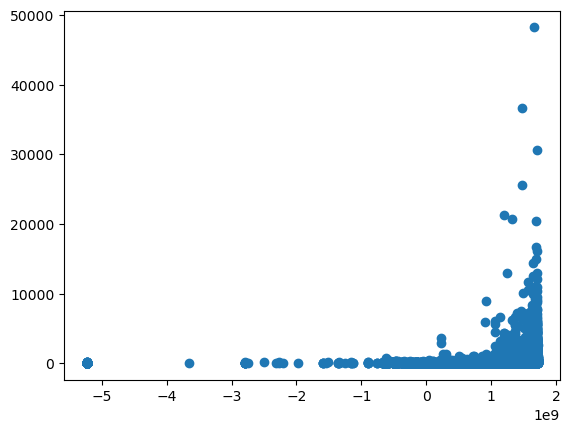

Correlation: 0.0892; P-value: 0.0000
La date de mise en effet a donc bien une influence sur le nombre de mots dans un article de loi


In [18]:
# Correlation date et taille des articles 
# list_annees = data["date"].astype(str).str[:4].drop_duplicates().to_list()
# print(f"Liste des année de mise en effet: {list_annees}")

# Conversion des strings de date en objets pd date_time
data['date'] = pd.to_datetime(data['date'])

# Conversion des dates en timestamps
data['timestamp'] = data['date'].apply(lambda x: x.timestamp())

# Représentation
plt.scatter(data['timestamp'], data['nbr_mot'])
plt.show()

# Calcul de corrélation
corr, p_value = stats.pearsonr(data['timestamp'], data['nbr_mot'])
print(f"Correlation: {corr:.4f}; P-value: {p_value:.4f}")

if p_value < 0.05:
    print("La date de mise en effet a donc bien une influence sur le nombre de mots dans un article de loi")
else: 
    print("La date de mise en effet n'a pas d'influence avec le nombre de mots")

